# Visualization for Geospatial Data (Lampung)

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

> ## Read Covid Case in Lampung

In [2]:
covid_lpg = pd.read_csv('lampung.csv').dropna()
covid_lpg = pd.DataFrame([covid_lpg.attributes__kabupaten, covid_lpg.attributes__kk_total]).transpose()
covid_lpg.head()

,attributes__kabupaten,attributes__kk_total
0,Kota Bandar Lampung,1660.0
17,Lampung Tengah,438.0
120,Lampung Utara,247.0
165,Lampung Selatan,199.0
251,Pesawaran,172.0


> ## Read Geometry Lampung

In [4]:
map_df = gpd.read_file("indonesia/idn_admbnda_adm2_bps_20200401.shp")
map_df.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,2.360029,0.228968,Aceh Barat,ID1107,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ..."
1,1.963994,0.154136,Aceh Barat Daya,ID1112,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((96.80559 3.71758, 96.80444 3.7..."
2,4.590182,0.236396,Aceh Besar,ID1108,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2..."
3,3.287754,0.316161,Aceh Jaya,ID1116,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((95.58431 4.61495, 95.58379 4.6..."
4,4.448584,0.343038,Aceh Selatan,ID1103,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8..."


> ## Visualize Plot

In [6]:
merged2 = map_df.merge(covid_lpg, left_on="ADM2_EN", right_on="attributes__kabupaten")
merged2.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,attributes__kabupaten,attributes__kk_total
0,0.989014,0.014345,Kota Bandar Lampung,ID1871,None,None,None,Lampung,ID18,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.25895 -5.48580, 105.25747 ...",Kota Bandar Lampung,1660.0
1,0.578212,0.006344,Kota Metro,ID1872,None,None,None,Lampung,ID18,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((105.32085 -5.05464, 105.32119 -5.055...",Kota Metro,130.0
2,3.352532,0.197410,Lampung Barat,ID1801,None,None,None,Lampung,ID18,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((103.77394 -4.77333, 103.77481 -4.775...",Lampung Barat,45.0
3,4.766347,0.176845,Lampung Selatan,ID1803,None,None,None,Lampung,ID18,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.44887 -6.13655, 105.45027 ...",Lampung Selatan,199.0
4,5.101770,0.376339,Lampung Tengah,ID1805,None,None,None,Lampung,ID18,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((105.64486 -4.48255, 105.64537 -4.483...",Lampung Tengah,438.0


<AxesSubplot:>

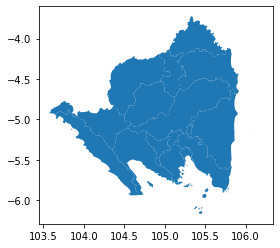

In [7]:
merged2.plot()

In [8]:
variable = 'attributes__kk_total'
vmin = merged2['attributes__kk_total'].min()
vmax = merged2['attributes__kk_total'].max()

Text(0.1, 0.1, 'Sumber: https://geoportal.lampungprov.go.id/')

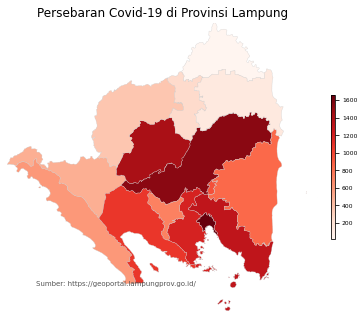

In [9]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
fig.set_facecolor("#ffffff")
fig.patch.set_facecolor("#ffffff")
ax.axis('off')
ax.margins(0)
ax.apply_aspect()
bbox = ax.get_window_extent().inverse_transformed(fig.transFigure)
w,h = fig.get_size_inches()
fig.set_size_inches(w*bbox.width, h*bbox.height)

merged2.plot(column=variable, cmap='Reds', linewidth=0.3, ax=ax, edgecolor='0.8')

cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax)), orientation="vertical", aspect=40, shrink=0.5, pad=0.03)
cbar.ax.tick_params(labelsize=6)

ax.set_title('Persebaran Covid-19 di Provinsi Lampung', \
              fontdict={'fontsize': '12',
                        'fontweight' : '3'})

ax.annotate('Sumber: https://geoportal.lampungprov.go.id/',
           xy=(0.1, 0.1), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='bottom',
           fontsize=7, color='#555555')

> ## Save fig into PNG

In [10]:
fig.savefig('Persebaran Covid-19 di Provinsi Lampung.png', dpi=180)